# 8-1 합성곱 연산

### 합성곱(convolution)

- 배열 w, x가 있을 때 원소수가 적은 배열의 원소 순서를 뒤집기. (w_r)
- w_r * x를 w_r을 오른쪽으로 한칸씩 이동하며 배열끼리 곱함.
- x의 끝까지 도착할 때까지 합성곱을 수행

In [26]:
# 배열 정의하기
import numpy as np
w = np.array([2, 1, 5, 3])
x = np.array([2, 8, 3, 7, 1, 2, 0, 4, 5])
w_r = np.flip(w) # 배열 뒤집기
print(w_r)

[3 5 1 2]


In [27]:
w_r = w[::-1] # 배열 뒤집기
print(w_r)

[3 5 1 2]


In [28]:
# 넘파이 점곱으로 합성곱 수행하기
for i in range(6):
  print(np.dot(x[i:i+4], w_r))

63
48
49
28
21
20


In [29]:
# 싸이파이로 합성곱 수행하기
from scipy.signal import convolve
convolve(x, w, mode = 'valid') # 뒤집을 필요 없이 x, w로 수행

array([63, 48, 49, 28, 21, 20])

### 합성곱 신경망은 합성곱을 사용하지 않고 교차 상관을 사용

- 교차 상관은 합성곱과 동일한 방법으로 연산 진행하지만, '배열을 뒤집지 않는다'는 점이 다름

In [30]:
# 싸이파이로 교차 상관 수행
from scipy.signal import correlate
correlate(x, w, mode = 'valid')

array([48, 57, 24, 25, 16, 39])

### 패딩과 스트라이드

- 패딩(padding) : 원본 배열의 양 긑에 빈 원소를 추가하는 것
- 스트라이드(stride) : 미끄러지는 배열의 간격을 조절

---

#### 패딩 개념이 어떻게 적용되는지에 따라 밸리드 패딩, 풀 패딩, 세임 패딩으로 불림

---

#### 밸리드 패딩

- 위 수행한 교차 수행에서 mode = 'valid'가 밸리드 패딩
  - 원본 배열의 첫 번재, 마지막 원소는 연산에 1번만 참여
  - 즉, 밸리드 패딩은 원본 배열의 양 끝 원소의 연산 참여도가 낮음

---

### 풀 패딩

- 원본 배열의 모든 원소가 연산에 동일하게 참여
  - 원본 배열의 양 끝에 가상의 원소 0을 추가하여 연산 참여도를 동일하게 만듦. --> 제로 패딩(zero padding)
  - mode = 'full'로 지정


In [31]:
# 풀 패딩
correlate(x, w, mode = 'full')

array([ 6, 34, 51, 48, 57, 24, 25, 16, 39, 29, 13, 10])

### 세임 패딩

- 출력 배열의 길이가 원본 배열의 길이와 같아지도록 원본 배열에 제로 패딩을 추가
  - ex) len(x) = 9 이므로, 왼쪽 끝에 2개, 오른쪽 끝에 1개의 제로 패딩  -->  출력 배열의 길이 = 9
  - mode = 'same'로 지정
  - 합성곱 신경망에서는 대부분 세임 패딩을 사용

In [32]:
# 세임 패딩
correlate(x, w, mode = 'same')

array([34, 51, 48, 57, 24, 25, 16, 39, 29])

### 스트라이드

- 미끄러지는 배열의 간격
- 위 연산들에서는 모드 1칸씩 미끄러지며 연산 수행  -->  stride를 2로 지정하면 2칸씩 미끄러지며 연산 수행
- 합성곱 신경망에서는 보통 stride를 1로 지정

- 합성곱 신경망에서는 대부분 2차원 배열을 사용

In [33]:
x = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
w = np.array([[2, 0], [0, 0]])
from scipy.signal import correlate2d # 2차원 배열 합성곱
correlate2d(x, w, mode = 'valid') # 밸리드 패딩

array([[ 2,  4],
       [ 8, 10]])

In [34]:
correlate2d(x, w, mode = 'same') # 세임 패딩

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

# 텐서플로로 수행

- 합성곱의 입력은 일반적으로 4차원 배열 conv2d()함수 사용
- x = 배치, 샘플의 높이, 샘플의 너비, 컬러 채널(2, 3, 3, 3)의 4차원 배열
- w = 가중치의 높이, 가중치의 너비, 채널, 가중치의 개수(2, 2, 3, 3)의 4차원 배열
- 출력 = x의 배치, x의 높이, x의 너비, w의 개수(2, 3, 3, 3)의 4차원 배열

In [35]:
# 2차원 배열을 4차원 배열로 바꾸기
import tensorflow as tf
x_4d = x.astype(np.float).reshape(1, 3, 3, 1)
w_4d = w.reshape(2, 2, 1, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
# 패딩 = 세임 패딩, 스트라이드 = 1
c_out = tf.nn.conv2d(x_4d, w_4d, strides = 1, padding = 'SAME')
# 결괏값으로 Tensor 객체를 반환
# 텐서플로에서는 다차원 배열을 Tensor라 부름

In [37]:
# 배치와 컬러를 제거
c_out.numpy().reshape(3, 3)
# 출력값은 correlate2d와 같지만 매개변수의 값은 4차원으로 다름

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.],
       [14., 16., 18.]])

# 8-2 풀링 연산

- 합성곱이 일어나는 층 = 합성곱층
- 풀링이 일어나는 층 = 풀링층
- 합성곱층과 풀링층에서 만들어진 결과를 **특성 맵(feature map)**이라 부름
- 합성곱 신경망에서는 최대 풀링과 평균 풀링을 주로 사용
- 이미지 분류 작업 시 최대 풀링을 선호

In [38]:
x = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]])
x = x.reshape(1, 4, 4, 1)

In [39]:
# 최대 풀링 수행
p_out = tf.nn.max_pool2d(x, ksize = 2, strides = 2, padding = 'VALID')
p_out.numpy().reshape(2, 2)

array([[ 6.,  8.],
       [14., 16.]], dtype=float32)

# 8-3 합성곱 신경망의 구조

- 렐루 함수(ReLU) : 0보다 큰 값은 그대로 통과시키고 0보다 작은 값은 0으로 만듦  ->  넘파이의 maximum()함수 사용

In [40]:
def relu(x):
  return np.maximum(x, 0)

In [41]:
x = np.array([-1, 2, -3, 4, -5])
relu(x)

array([0, 2, 0, 4, 0])

In [42]:
# 텐서플로의 렐루
r_out = tf.nn.relu(x)
r_out.numpy()

array([0, 2, 0, 4, 0])

# 8-4 합성곱 신경망을 만들고 훈련

- 정방향 계산 : 합성곱, 렐ㄹ, 풀링 적용
- 역방향 계산 : 텐서플로의 자동 미분 기능 사용

In [43]:
# 자동 미분
x = tf.Variable(np.array([1.0, 2.0, 3.0]))
with tf.GradientTape() as tape:
  y = x ** 3 + 2 * x + 5
# 그래이디언트 계산
print(tape.gradient(y, x))

tf.Tensor([ 5. 14. 29.], shape=(3,), dtype=float64)


In [44]:
class ConvolutionNetwork:
    
    def __init__(self, n_kernels=10, units=10, batch_size=32, learning_rate=0.1):
        self.n_kernels = n_kernels  
        self.kernel_size = 3        
        self.optimizer = None       
        self.conv_w = None          # 합성곱 층의 가중치
        self.conv_b = None          # 합성곱 층의 절편
        self.units = units          
        self.batch_size = batch_size
        self.w1 = None              
        self.b1 = None              
        self.w2 = None              
        self.b2 = None              
        self.a1 = None              
        self.losses = []            
        self.val_losses = []       
        self.lr = learning_rate     

    def forpass(self, x):
        # 3x3 합성곱 연산을 수행
        c_out = tf.nn.conv2d(x, self.conv_w, strides=1, padding='SAME') + self.conv_b
        # 렐루 활성화 함수를 적용
        r_out = tf.nn.relu(c_out)
        # 2x2 최대 풀링을 적용
        p_out = tf.nn.max_pool2d(r_out, ksize=2, strides=2, padding='VALID')
        # 첫 번째 배치 차원을 제외하고 출력을 일렬로 펼침
        f_out = tf.reshape(p_out, [x.shape[0], -1])
        z1 = tf.matmul(f_out, self.w1) + self.b1     
        a1 = tf.nn.relu(z1)                          
        z2 = tf.matmul(a1, self.w2) + self.b2        
        return z2
    
    def init_weights(self, input_shape, n_classes):
        g = tf.initializers.glorot_uniform()
        self.conv_w = tf.Variable(g((3, 3, 1, self.n_kernels)))
        self.conv_b = tf.Variable(np.zeros(self.n_kernels), dtype=float)
        n_features = 14 * 14 * self.n_kernels
        self.w1 = tf.Variable(g((n_features, self.units)))          
        self.b1 = tf.Variable(np.zeros(self.units), dtype=float)    
        self.w2 = tf.Variable(g((self.units, n_classes)))           
        self.b2 = tf.Variable(np.zeros(n_classes), dtype=float)     
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.init_weights(x.shape, y.shape[1])
        self.optimizer = tf.optimizers.SGD(learning_rate=self.lr)
        for i in range(epochs):
            print('에포크', i, end=' ')
            batch_losses = []
            for x_batch, y_batch in self.gen_batch(x, y):
                print('.', end='')
                self.training(x_batch, y_batch)
                batch_losses.append(self.get_loss(x_batch, y_batch))
            print()
            self.losses.append(np.mean(batch_losses))
            self.val_losses.append(self.get_loss(x_val, y_val))

    def gen_batch(self, x, y):
        bins = len(x) // self.batch_size                   
        indexes = np.random.permutation(np.arange(len(x))) 
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   
            
    def training(self, x, y):
        m = len(x)                    
        with tf.GradientTape() as tape:
            z = self.forpass(x)       
            loss = tf.nn.softmax_cross_entropy_with_logits(y, z)
            loss = tf.reduce_mean(loss)

        weights_list = [self.conv_w, self.conv_b,
                        self.w1, self.b1, self.w2, self.b2]
        grads = tape.gradient(loss, weights_list)
        self.optimizer.apply_gradients(zip(grads, weights_list))
   
    def predict(self, x):
        z = self.forpass(x)                 
        return np.argmax(z.numpy(), axis=1) 
    
    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환
        return np.mean(self.predict(x) == np.argmax(y, axis=1))

    def get_loss(self, x, y):
        z = self.forpass(x)
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, z))
        return loss.numpy()

In [45]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify = y_train_all, test_size = 0.2, random_state = 42)

In [47]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [48]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)
x_train.shape

(48000, 28, 28, 1)

In [49]:
x_train = x_train / 255
x_val = x_val / 255

In [50]:
cn = ConvolutionNetwork(n_kernels = 10, units = 100, batch_size = 128, learning_rate = 0.01)
cn.fit(x_train, y_train_encoded, x_val = x_val, y_val = y_val_encoded, epochs = 20)

에포크 0 .......................................................................................................................................................................................................................................................................................................................................................................................
에포크 1 .......................................................................................................................................................................................................................................................................................................................................................................................
에포크 2 ......................................................................................................................................................................................................................................

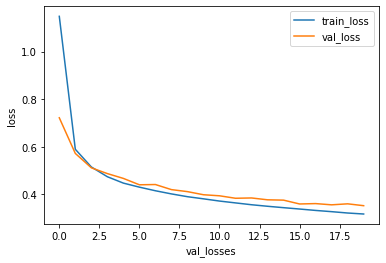

In [51]:
import matplotlib.pyplot as plt

plt.plot(cn.losses)
plt.plot(cn.val_losses)
plt.ylabel('loss')
plt.xlabel('val_losses')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [52]:
cn.score(x_val, y_val_encoded)

0.8779166666666667

# 8-5 케라스로 합성곱 신경망 만들기

- 케라스의 합성곱층은 Conv2D 클래스
- 최대 풀링 : MaxPooling2D
- 특성 맵을 일렬로 펼칠 때 Flatten 클래스 사용

In [54]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [55]:
# 합성곱층 쌓기
# 합성곱 커널로는 3x3 5x5 크기를 많이 사용
conv1 = tf.keras.Sequential()
conv1.add(Conv2D(10, (3, 3), activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))

In [58]:
# 풀링층 쌓기
conv1.add(MaxPooling2D((2, 2)))

In [59]:
# 완전 연결층에 주입할 수 있도록 배치 차원을 제외하고 일렬로 펼쳐야 함
conv1.add(Flatten()) 

In [61]:
# 완전 연결층 쌓기
conv1.add(Dense(100, activation = 'relu'))
conv1.add(Dense(10, activation = 'softmax'))

In [62]:
conv1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 10)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1960)              0         
                                                                 
 dense (Dense)               (None, 100)               196100    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
________________________________________________

배치 차원이 None인 이유 : 배치 입력의 개수는 훈련할 때 전달되는 샘플 개수에 따라 달라지기 때문

In [63]:
# 모델 컴파일
conv1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [65]:
# 적응적 학습률 알고리즘 '아담(Adam) 옵티마이저' 사용
# 손실 함수의 값이 최적값에 가까워질수록 학습률을 낮춰 손실 함수의 값이 안정적으로 수렴될 수 있게 함
history = conv1.fit(x_train, y_train_encoded, epochs = 20, validation_data = (x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 26s 17ms/step - loss: 0.4592 - accuracy: 0.8387 - val_loss: 0.3435 - val_accuracy: 0.8794
Epoch 2/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.3201 - accuracy: 0.8861 - val_loss: 0.2919 - val_accuracy: 0.8971
Epoch 3/20
1500/1500 [==============================] - 25s 16ms/step - loss: 0.2736 - accuracy: 0.8999 - val_loss: 0.2864 - val_accuracy: 0.8991
Epoch 4/20
1500/1500 [==============================] - 28s 19ms/step - loss: 0.2399 - accuracy: 0.9130 - val_loss: 0.2600 - val_accuracy: 0.9091
Epoch 5/20
1500/1500 [==============================] - 25s 16ms/step - loss: 0.2153 - accuracy: 0.9197 - val_loss: 0.2746 - val_accuracy: 0.9028
Epoch 6/20
1500/1500 [==============================] - 25s 16ms/step - loss: 0.1945 - accuracy: 0.9286 - val_loss: 0.2675 - val_accuracy: 0.9059
Epoch 7/20
1500/1500 [==============================] - 25s 16ms/step - loss: 0.1758 - accuracy: 0.9338 - val_loss: 0.2562 -

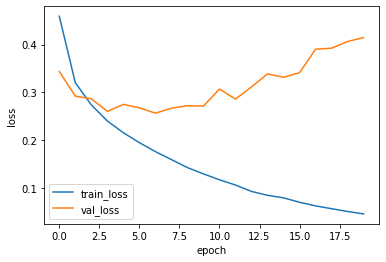

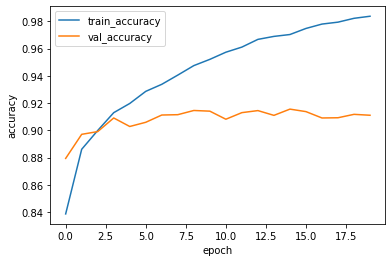

In [66]:
 plt.plot(history.history['loss'])
 plt.plot(history.history['val_loss'])
 plt.ylabel('loss')
 plt.xlabel('epoch')
 plt.legend(['train_loss', 'val_loss'])
 plt.show()

 plt.plot(history.history['accuracy'])
 plt.plot(history.history['val_accuracy'])
 plt.ylabel('accuracy')
 plt.xlabel('epoch')
 plt.legend(['train_accuracy', 'val_accuracy'])
 plt.show()

# 드롭아웃
- 신경망에서 과대적합을 줄이는 방법 중 하나
- 무작위로 뉴런을 비활성화 -> 특정 뉴런에 과도하게 의존하여 훈련하는 것을 막아줌
- 특정 뉴런에 과도하게 의존하지 않고 모든 뉴런이 의미있는 패턴을 학습

In [70]:
# 텐서플로에서 드롭아웃 - Dropout 클래스
# 케라스로 만든 합성곱 신경망에 드롭아웃 적용
from tensorflow.keras.layers import Dropout
conv2 = tf.keras.Sequential()
conv2.add(Conv2D(10, (3, 3), activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))
conv2.add(MaxPooling2D((2, 2)))
conv2.add(Flatten())
conv2.add(Dropout(0.5))
conv2.add(Dense(100, activation = 'relu'))
conv2.add(Dense(10, activation = 'softmax'))

In [71]:
# 드롭아웃층 확인
conv2.summary()
# 가중치가 없고 텐서의 차원을 바꾸지 않음

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 10)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1960)              0         
                                                                 
 dropout (Dropout)           (None, 1960)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               196100    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                      

In [72]:
# 훈련
conv2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = conv2.fit(x_train, y_train_encoded, epochs = 20, validation_data = (x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.4997 - accuracy: 0.8204 - val_loss: 0.3427 - val_accuracy: 0.8805
Epoch 2/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.3666 - accuracy: 0.8664 - val_loss: 0.3009 - val_accuracy: 0.8928
Epoch 3/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.3283 - accuracy: 0.8801 - val_loss: 0.2775 - val_accuracy: 0.9006
Epoch 4/20
1500/1500 [==============================] - 26s 17ms/step - loss: 0.3056 - accuracy: 0.8866 - val_loss: 0.2779 - val_accuracy: 0.8992
Epoch 5/20
1500/1500 [==============================] - 28s 19ms/step - loss: 0.2840 - accuracy: 0.8952 - val_loss: 0.2566 - val_accuracy: 0.9074
Epoch 6/20
1500/1500 [==============================] - 26s 17ms/step - loss: 0.2674 - accuracy: 0.9002 - val_loss: 0.2490 - val_accuracy: 0.9088
Epoch 7/20
1500/1500 [==============================] - 26s 17ms/step - loss: 0.2565 - accuracy: 0.9036 - val_loss: 0.2412 -

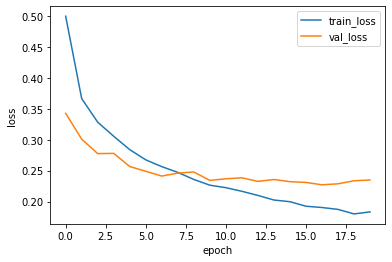

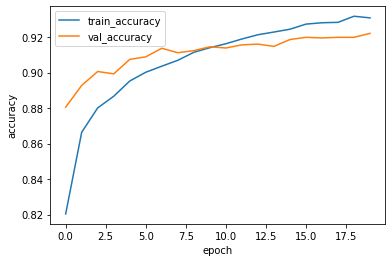

In [73]:
 plt.plot(history.history['loss'])
 plt.plot(history.history['val_loss'])
 plt.ylabel('loss')
 plt.xlabel('epoch')
 plt.legend(['train_loss', 'val_loss'])
 plt.show()

 plt.plot(history.history['accuracy'])
 plt.plot(history.history['val_accuracy'])
 plt.ylabel('accuracy')
 plt.xlabel('epoch')
 plt.legend(['train_accuracy', 'val_accuracy'])
 plt.show()